In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # OpenCV is used for manipulating images
            # for more info, visit https://opencv.org/

# Extracting veins of the leaf

We will first read the image of the flower:

original image shape = (1026, 1000, 3)


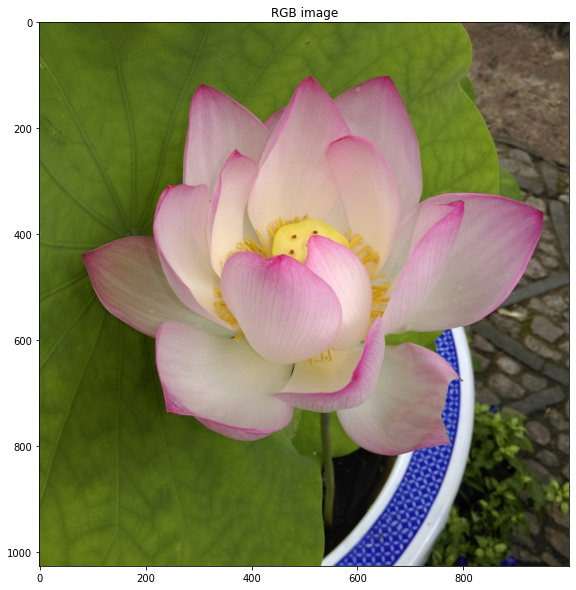

In [12]:
img_bgr = cv2.imread('flower_color.jpg')
img_val = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB);
plt.figure(figsize=(10,10))

plt.imshow(img_val)
plt.title('RGB image')

print('original image shape = {}'.format(img_val.shape))

# Forming the mask for the leaf area

## Increasing difference between the relevant and irrelevant part of the image

Observing separate channels of the image, we notice that the contrast for the leaf is **the highest** on the green channel and **the lowest** on the blue channel.<br>
Therefore, we will use the difference between these channels.

> This selection is much easier in the HSV colorspace, but we will learn about it later in the course.

Text(0.5, 1.0, 'Blue channel')

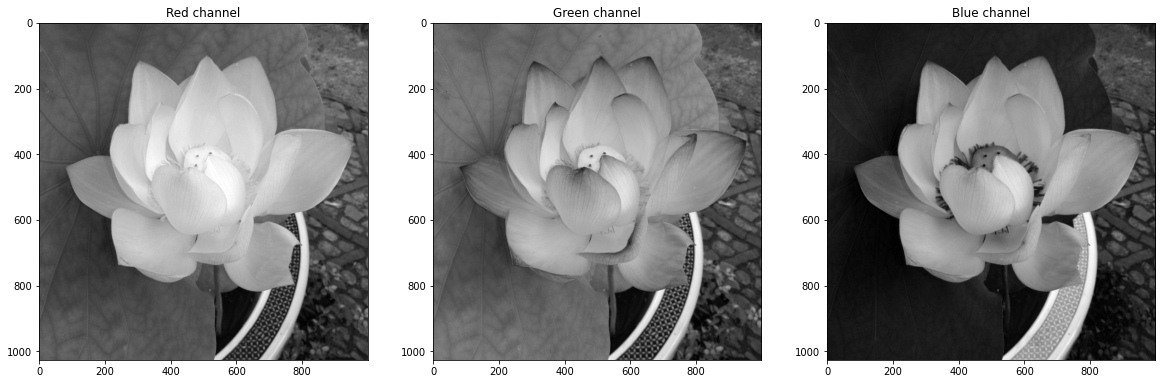

In [13]:
plt.figure(figsize=(20,7))

plt.subplot(131)
plt.imshow(img_val[:,:,0], cmap='gray')
plt.title('Red channel')

plt.subplot(132)
plt.imshow(img_val[:,:,1], cmap='gray')
plt.title('Green channel')

plt.subplot(133)
plt.imshow(img_val[:,:,2], cmap='gray')
plt.title('Blue channel')

We will plot once more only the difference image and its colorbar.
We see that we have managed to make the irrelevant parts much darker or much lighter than the leaf.

the type of the img_leaf variable is float64


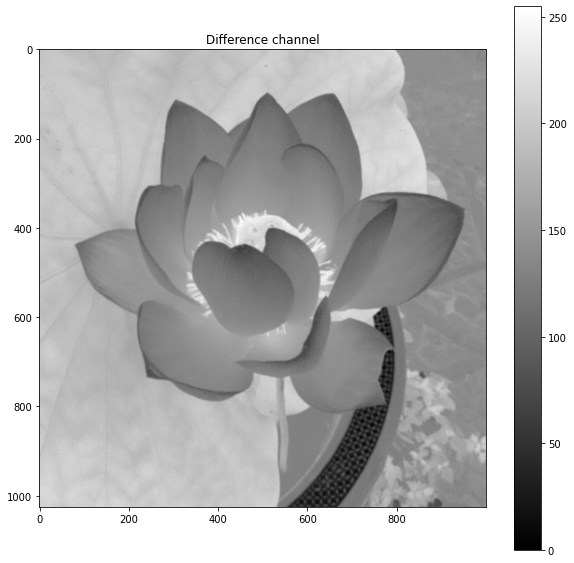

In [24]:
img_leaf = (img_val[:,:,1].astype(int) - img_val[:,:,2].astype(int))
# to avoid negative parts
img_leaf = 255*(img_leaf - np.min(img_leaf))/(np.max(img_leaf) - np.min(img_leaf))
#----------------------------------------------------------------------

# if I didn't convert channels to int
#img_leaf = (img_val[:,:,1] - img_val[:,:,2])

plt.figure(figsize=(10,10))

plt.imshow(img_leaf, cmap='gray')
plt.title('Difference channel')
plt.colorbar()

print('the type of the img_leaf variable is {}'.format(img_leaf.dtype))

## Selecting the relevant mask

Please, pay attention to colorbars, since they have now values from [0,1]
> Booleans, selection and operations with them are a topic of later chapters

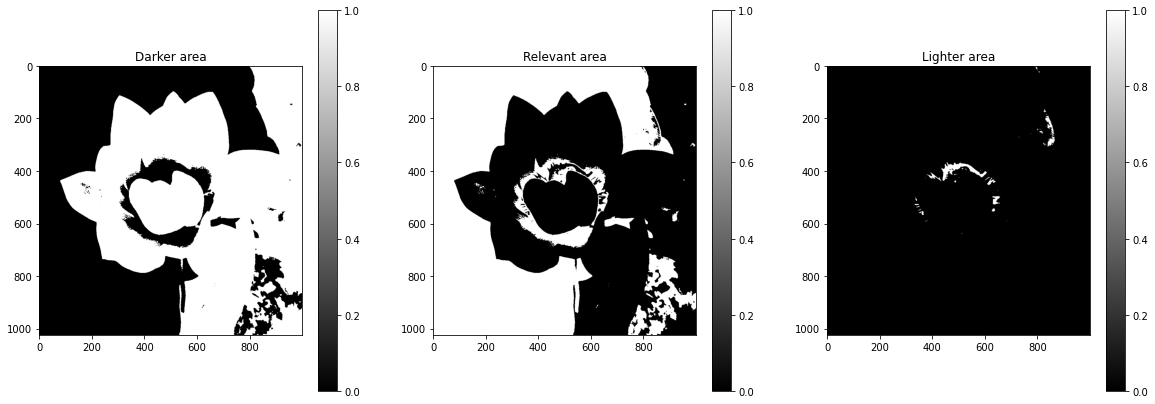

In [25]:
plt.figure(figsize=(20,7))

# change these two parameters to notice different selections:
limit_val_1 = 155
limit_val_2 = 220
#------------------------------------------------------------

# extracting the real dark areas
plt.subplot(131)
mask_darker = (img_leaf<=limit_val_1)
plt.imshow(mask_darker, cmap='gray')
plt.title('Darker area')
plt.colorbar()

plt.subplot(132)
mask_relevant = ((img_leaf>limit_val_1)&(img_leaf<=limit_val_2))
plt.imshow(mask_relevant, cmap='gray')
plt.title('Relevant area')
plt.colorbar()

# extracting the real light areas
plt.subplot(133)
mask_lighter = (img_leaf > limit_val_2)
plt.imshow(mask_lighter, cmap='gray')
plt.title('Lighter area')
plt.colorbar()

We will improve the relevant mask with the red channel, since the whole flower is lighter than the rest in red:

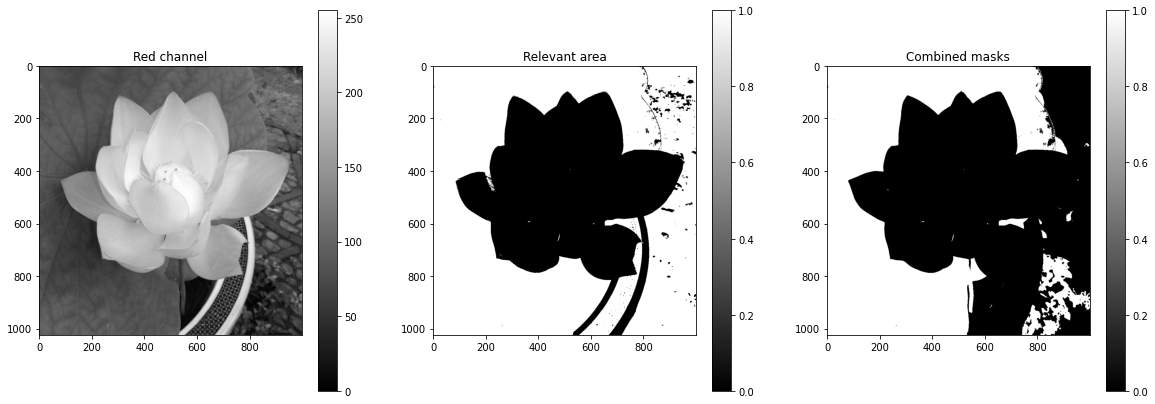

In [16]:
plt.figure(figsize=(20,7))

# change these two parameters to notice different selections:
limit_red = 120
#------------------------------------------------------------

# extracting the real dark areas
plt.subplot(131)
img_red = img_val[:,:,0]
plt.imshow(img_red, cmap='gray')
plt.title('Red channel')
plt.colorbar()

plt.subplot(132)
mask_red = (img_red<limit_red)
plt.imshow(mask_red, cmap='gray')
plt.title('Relevant area')
plt.colorbar()

# extracting the real light areas
plt.subplot(133)
mask_final = mask_red&mask_relevant
plt.imshow(mask_final, cmap='gray')
plt.title('Combined masks')
plt.colorbar()

## Detecting edges

For detecting edges, Canny detector can be used. <br>

We will learn about this detector later in the course, now just draw the edge map.<br>
> Tutorial for the Canny detector:
> https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

(1026, 1000)

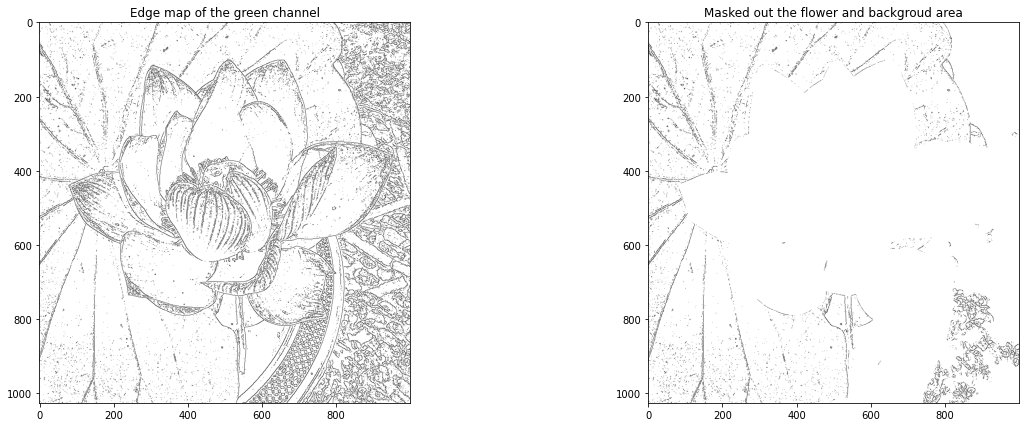

In [17]:
plt.figure(figsize=(20,7))

#---------------------------------------
plt.subplot(121)
img_edges_green= cv2.Canny(img_val.astype(np.uint8),40,40)
plt.imshow(255 - img_edges_green, cmap='gray', vmin=0, vmax=255)
plt.title('Edge map of the green channel')


#---------------------------------------
# adding the same change to the green channel
plt.subplot(122)
img_edges_green_edit = np.zeros(img_edges_green.shape)
img_edges_green_edit[mask_final] = img_edges_green[mask_final]

# normalize
plt.imshow(255 - img_edges_green_edit, cmap='gray', vmin=0, vmax=255)
plt.title('Masked out the flower and backgroud area')

img_edges_green_edit.shape

# Creating a beautiful display of results

We can combine results in one RGB image where we mark selected area with the color.
> For now, you can pay attention to the stack command as it is how we can combine gray value images into a color one

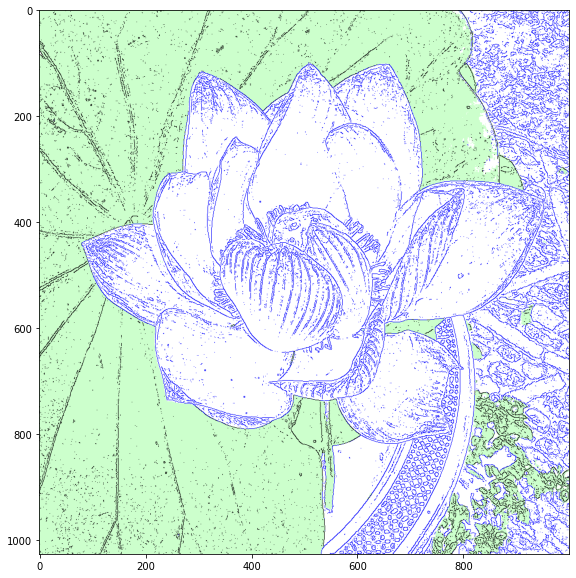

In [18]:
plt.figure(figsize=(10,10))

chan_val_r = np.uint8((255 - img_edges_green)*(1-0.2*mask_final))
chan_val_g = np.uint8((255 - img_edges_green))
chan_val_b = np.uint8((255 - img_edges_green_edit)*(1-0.2*mask_final))

img_leaf_3c = np.stack((chan_val_r, chan_val_g, chan_val_b), axis=2)

plt.imshow(img_leaf_3c)